In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import sigutils

Here is a basic Bode plot using `scipy.signal` to generate the transfer function.

(<matplotlib.figure.Figure at 0x1094b2650>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1094b2a50>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10a00a8d0>))

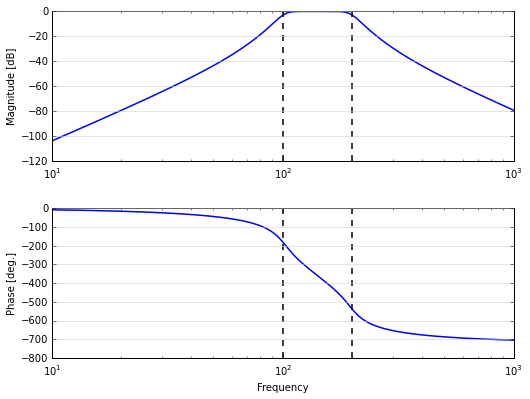

In [2]:
sigutils.bode_sys(signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass'), xlim=(10, 1000), gain_point=-3)

Here is a plot using `bode_syss` to plot multiple transfer functions on the same graph.

(<matplotlib.figure.Figure at 0x10b6ec0d0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x10b6df2d0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10b9f9250>))

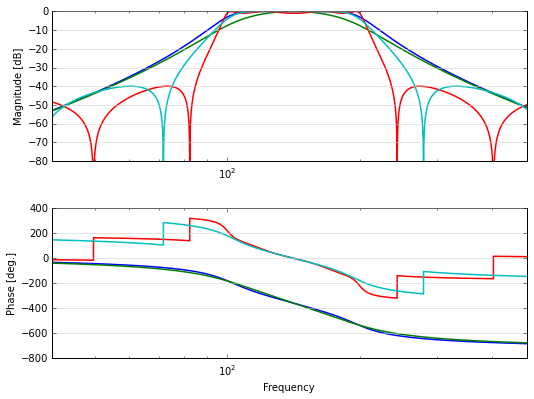

In [3]:
butter = signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
bessel = signal.bessel(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
ellip  =  signal.ellip(4, 1, 40, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
cheb2  = signal.cheby2(4, 40, [100*2*np.pi*0.75, 200*2*np.pi/0.75], analog=True, btype='bandpass')
sigutils.bode_syss((butter, bessel, ellip, cheb2), xlim=(40, 480), mag_lim=(-80, 0, 10),)

Quickly compare different filter parameters using `bode_firs`.

(<matplotlib.figure.Figure at 0x10b251810>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x10b64c710>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10c113090>))

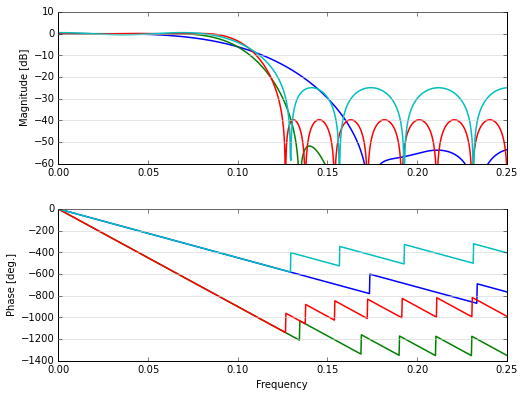

In [4]:
sigutils.bode_firs((signal.firwin(51, 0.1, nyq=1), signal.firwin(101, 0.1, nyq=1), signal.remez(101, [0, 0.085, 0.125, 1], [1, 0], Hz=2),  signal.remez(51, [0, 0.085, 0.125, 1], [1, 0], Hz=2)), xlim=(0, 0.25), mag_lim=(-60, 10, 10))